In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [48]:
def successCalc(outcome):
    if 'True' in str(outcome):
        return True
    else:
        return False


In [49]:
def extract_year(date):
    return date.split('-')[0]

In [52]:
df['Success'] = df.Outcome.apply(successCalc)
df['year'] = list(map(extract_year,df.Date))
df.head(8)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Success,year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,False,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,False,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,False,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,False,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,False,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0,False,2014
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,True,2014
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,True,2014


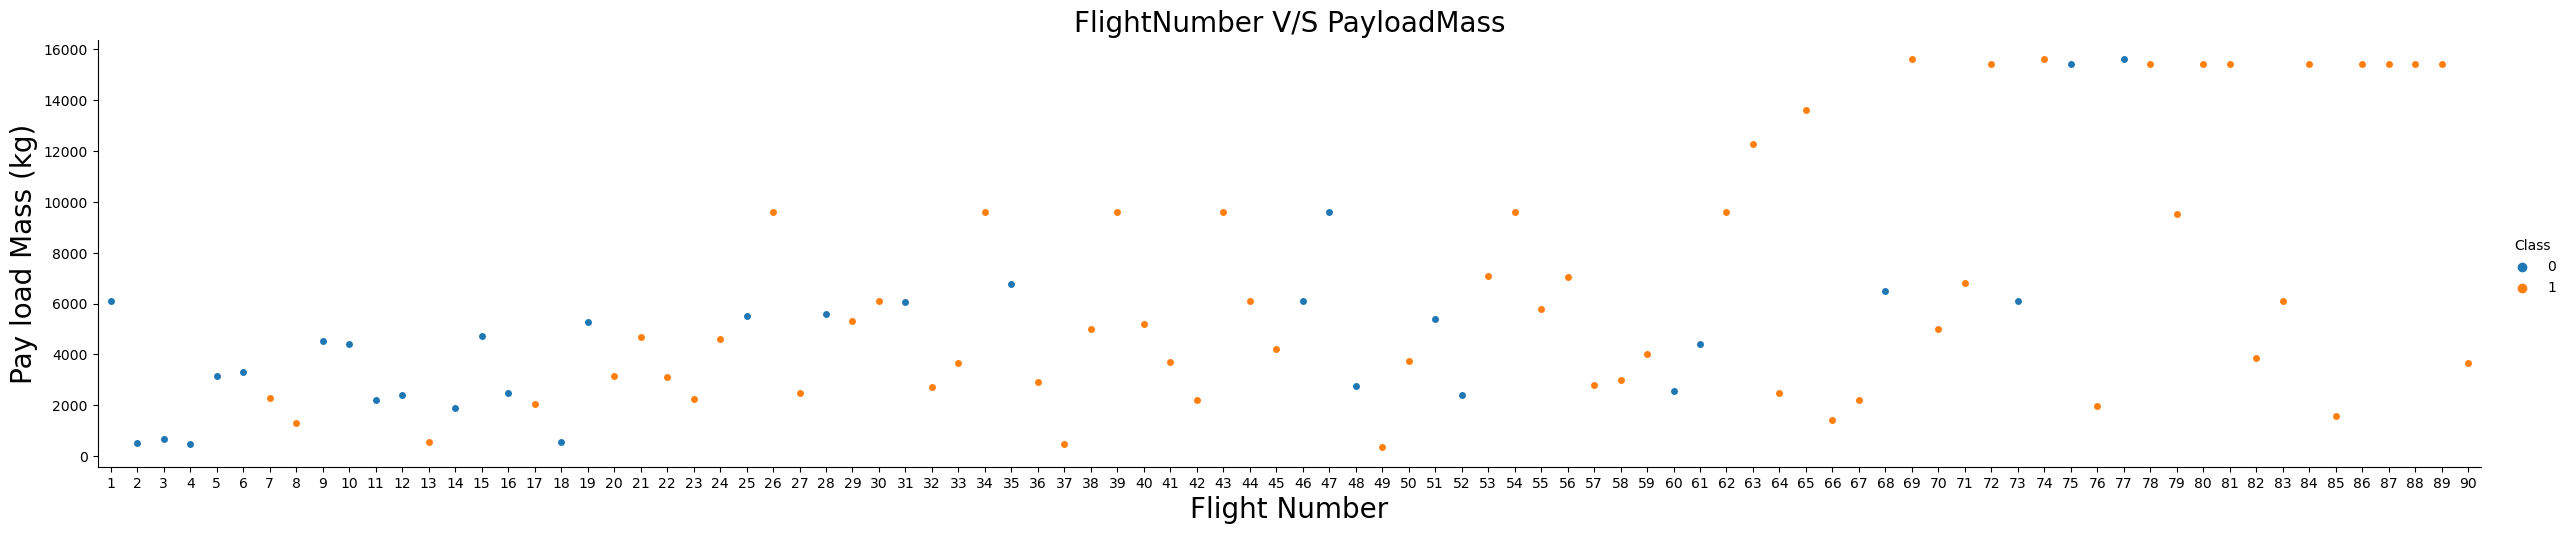

In [42]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title("FlightNumber V/S PayloadMass",fontsize=20)
plt.show()

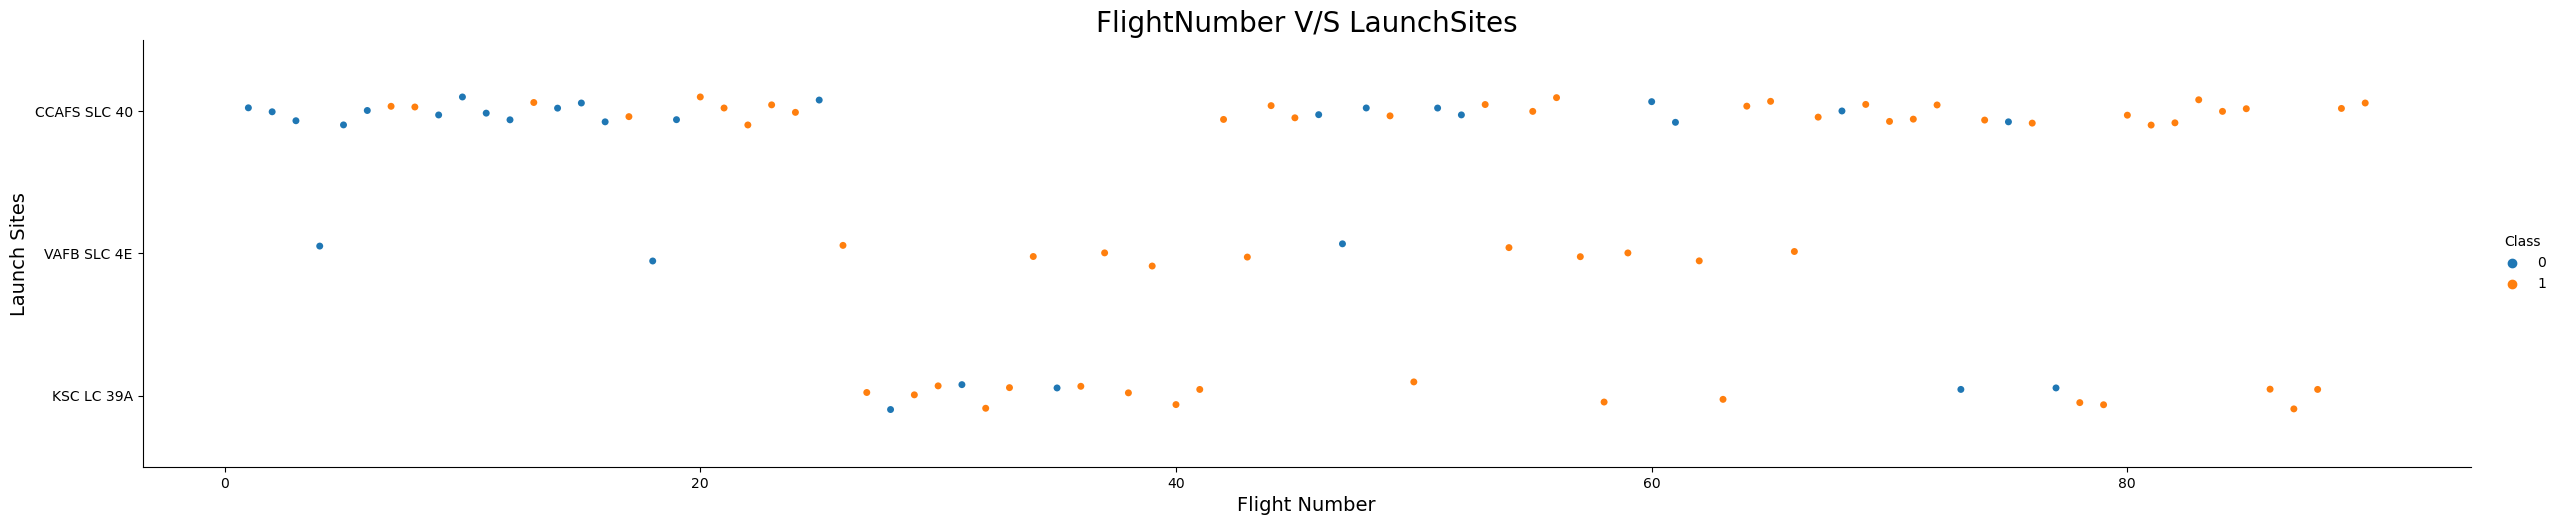

In [43]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number',fontsize=14)
plt.ylabel('Launch Sites',fontsize=14)

plt.title("FlightNumber V/S LaunchSites",fontsize=20)
plt.show()

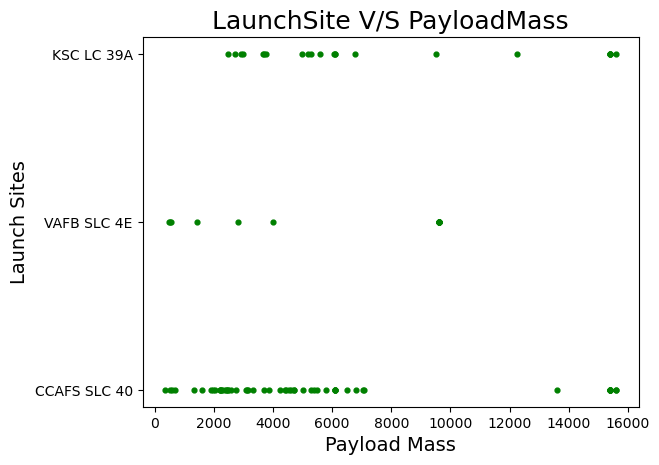

In [44]:
df.plot.scatter(x='PayloadMass',y='LaunchSite',color='green',s=12)
plt.xlabel('Payload Mass',fontsize=14)
plt.ylabel('Launch Sites',fontsize=14)
plt.title("LaunchSite V/S PayloadMass",fontsize=18)
plt.show()

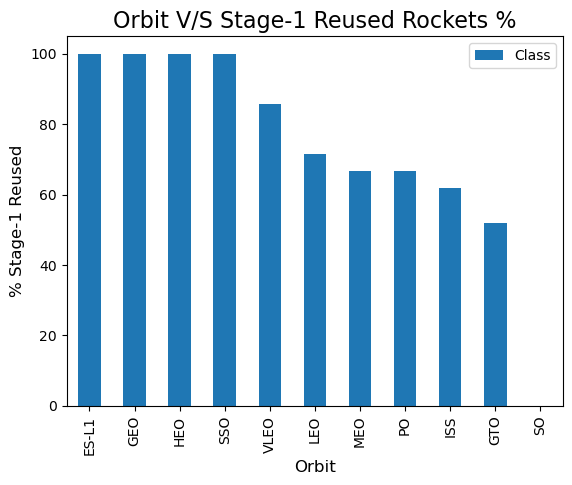

In [61]:

#################  RECHECK  #################


or_gp = df[['Orbit','Class']].groupby(['Orbit']).mean()*100
or_gp.sort_values('Class',ascending=False).plot.bar()
plt.xlabel('Orbit',fontsize=12)
plt.ylabel('% Stage-1 Reused',fontsize=12)
plt.title("Orbit V/S Stage-1 Reused Rockets %",fontsize=16)
plt.show()


# or_gp = df[['Orbit','Reused']].groupby(['Orbit']).mean()*100
# or_gp.sort_values('Reused',ascending=False).plot.bar()
# plt.xlabel('Orbit',fontsize=12)
# plt.ylabel('% Stage-1 Reused',fontsize=12)
# plt.title("Orbit V/S Stage-1 Reused Rockets %",fontsize=16)
# plt.show()

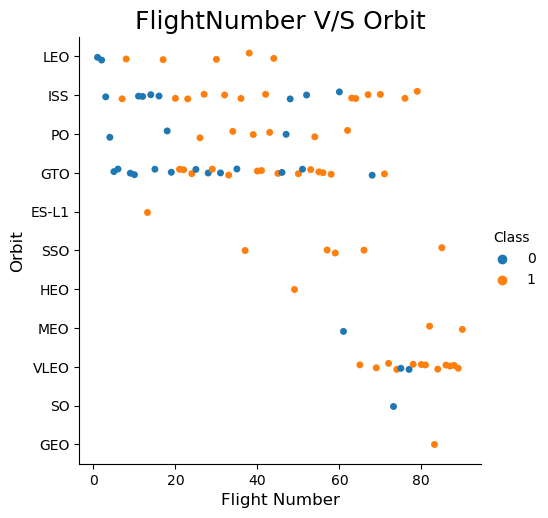

In [58]:
sns.catplot(data=df,x='FlightNumber',y='Orbit',hue='Class')
plt.xlabel('Flight Number',fontsize=12)
plt.ylabel('Orbit',fontsize=12)
plt.title('FlightNumber V/S Orbit',fontsize=18)
plt.show()

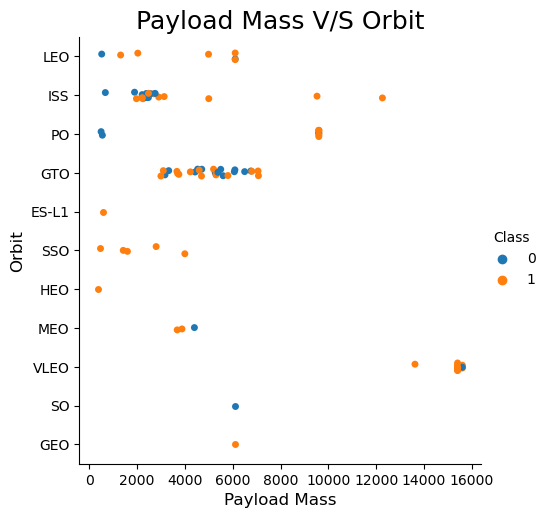

In [59]:
sns.catplot(data=df, x='PayloadMass',y='Orbit',hue='Class')
plt.xlabel('Payload Mass',fontsize=12)
plt.ylabel('Orbit',fontsize=12)
plt.title('Payload Mass V/S Orbit',fontsize=18)
plt.show()

In [60]:
yr_gp = df[['year','Class']].groupby(['year']).mean()*100
yr_gp.head()

,Class
year,
2010,0.000000
2012,0.000000
2013,0.000000
2014,33.333333
2015,33.333333


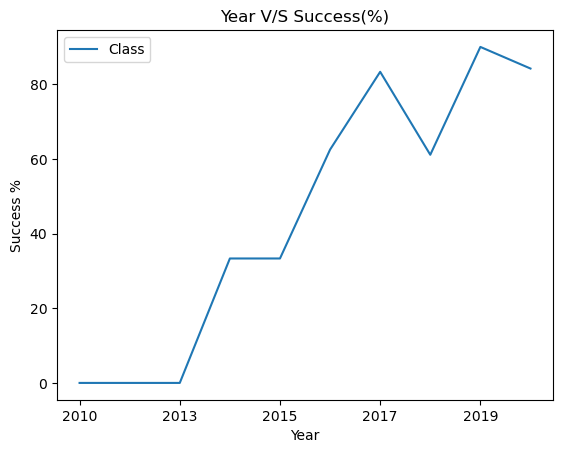

In [65]:
yr_gp.plot.line()
plt.xlabel('Year')
plt.ylabel('Success %')
plt.title('Year V/S Success(%)')
plt.show()

In [66]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [74]:
features_one_hot = pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'],drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_GEO                            90 non-null     uint8  
 9   Orbit_GTO                            90 non-null     uint8  
 10  Orbit_HEO                            90 non-null     uint8  
 11  Orbit_ISS                         

In [77]:
features_one_hot = features_one_hot.astype(np.float64)
features_one_hot.info()
# features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_GEO                            90 non-null     float64
 9   Orbit_GTO                            90 non-null     float64
 10  Orbit_HEO                            90 non-null     float64
 11  Orbit_ISS                         

In [78]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)